In [1]:
!pip install pandas seaborn scikit-learn

In [2]:
!pip install ipywidgets plotly

# Домашнее задание 4

1. Преобразовать датасет (процессинг категориальных признаков, копия данных в df_not_processed, scale датасета)
2. Сделать k-means кластеризацию (записать cluster в df_not_processed, вывести статистику, графики. попробовать объяснить принцип кластеризации), оценить метриками, вывести результат
3. Подобрать оптимальное число кластеров с помощью "метод локтя", вывести статистику, графики, метрики, объяснить результат
4. Сделать DBSSCAN кластеризацию, подобрать оптимальные параметры, посчитать метрики, вывести статистику, объяснить результат
5. Ответить на вопрос - какой из методов кластеризации больше подходит для вашего датасета

### **1. Преобразовать датасет (процессинг категориальных признаков, копия данных в df_not_processed, scale датасета)**

In [3]:
import pandas as pd
df = pd.read_csv('student_performance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   attendance_percentage    1000000 non-null  float64
 3   class_participation      1000000 non-null  float64
 4   total_score              1000000 non-null  float64
 5   grade                    1000000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ MB


In [4]:
df['grade'] = df['grade'].astype('category')

In [5]:
category_columns: list[str] = df.select_dtypes(include=['category']).columns

df = pd.get_dummies(df, columns=category_columns, drop_first=True)

In [6]:
df_not_processed = df.copy()

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = MinMaxScaler() or StandardScaler()

df[numeric_features] = scaler.fit_transform(df[numeric_features])
df


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade_B,grade_C,grade_D,grade_F
0,0.000000,0.4625,0.912,0.38,0.976821,False,False,False,False
1,0.000001,0.3500,0.600,0.25,0.822296,True,False,False,False
2,0.000002,0.4875,0.726,0.53,1.000000,False,False,False,False
3,0.000003,0.6425,0.404,0.70,1.000000,False,False,False,False
4,0.000004,0.3350,0.638,0.69,0.911700,False,False,False,False
...,...,...,...,...,...,...,...,...,...
999995,0.999996,0.4500,0.910,0.48,1.000000,False,False,False,False
999996,0.999997,0.3925,0.654,0.67,0.870861,False,False,False,False
999997,0.999998,0.3550,0.702,0.58,0.866446,False,False,False,False
999998,0.999999,0.6325,0.800,0.53,1.000000,False,False,False,False


Данные подготовлены для машинного обучения — категориальные признаки закодированы, числовые нормализованы.

### **2. Сделать k-means кластеризацию (записать cluster в df_not_processed, вывести статистику, графики. попробовать объяснить принцип кластеризации), оценить метриками, вывести результат**

In [8]:
X = df[numeric_features]

In [9]:
from sklearn.cluster import KMeans
import pandas as pd

kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X)

df_cluster = df_not_processed.copy()
df_cluster['cluster'] = clusters

cluster_means = df_cluster.groupby('cluster').mean()
cluster_means.round(2)

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade_B,grade_C,grade_D,grade_F
cluster,,,,,,,,,
0,245920.77,7.81,84.47,6.14,66.22,0.40,0.43,0.14,0.02
1,723681.14,17.71,74.31,6.00,91.50,0.24,0.02,0.00,0.00
2,246578.26,18.88,84.97,7.59,93.56,0.17,0.00,0.00,0.00
3,762786.80,19.13,91.57,6.07,94.08,0.15,0.00,0.00,0.00
4,754366.58,7.87,85.94,5.95,66.46,0.41,0.42,0.14,0.02
5,268624.03,17.99,85.47,4.02,92.03,0.22,0.01,0.00,0.00


In [10]:
clusters

array([5, 5, 5, ..., 3, 3, 3], dtype=int32)

Количество кластеров: 6
Выбросы (шум): 0 образцов

Кластер 0: 160644 образцов (16.1%)

Кластер 1: 152579 образцов (15.3%)

Кластер 2: 177225 образцов (17.7%)

Кластер 3: 182883 образцов (18.3%)

Кластер 4: 162894 образцов (16.3%)

Кластер 5: 163775 образцов (16.4%)


Silhouette Score: 0.177
Davies-Bouldin Index: 1.571
Calinski-Harabasz Index: 236011.568


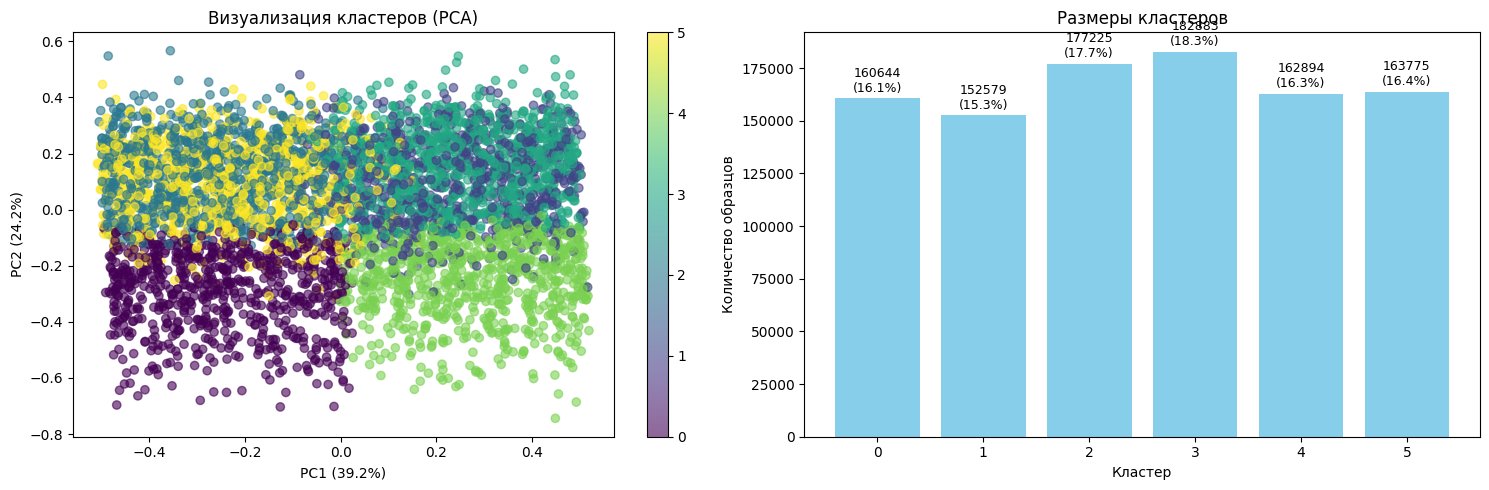

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import numpy as np

unique_labels = set(clusters)
n_clusters = len(unique_labels) - (1 if -1 in clusters else 0)
n_noise = np.sum(clusters == -1)

print(f'Количество кластеров: {n_clusters}')
print(f'Выбросы (шум): {n_noise} образцов')

if 'title' in df_cluster.columns or 'name' in df_cluster.columns:
    title_col = 'title' if 'title' in df_cluster.columns else 'name'

    for label in sorted(unique_labels):
        if label == -1:
            continue

        cluster_samples = df_cluster[df_cluster['cluster'] == label][title_col].head(3)
        cluster_size = len(df_cluster[df_cluster['cluster'] == label])

        print(f'\n--- Кластер {label} ({cluster_size} образцов) ---')
        for i, sample in enumerate(cluster_samples, 1):
            print(f'{i}. {sample}')
else:
    for label in sorted(unique_labels):
        if label == -1:
            continue

        cluster_size = len(df_cluster[df_cluster['cluster'] == label])
        print(f'\nКластер {label}: {cluster_size} образцов ({(cluster_size/len(df_cluster)*100):.1f}%)')

print("\n")

sample_size = min(5000, len(X))
indices = np.random.choice(len(X), sample_size, replace=False)

silhouette = silhouette_score(X.iloc[indices] if hasattr(X, 'iloc') else X[indices], clusters[indices])
davies_bouldin = davies_bouldin_score(X, clusters)
calinski = calinski_harabasz_score(X, clusters)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")
print(f"Calinski-Harabasz Index: {calinski:.3f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

pca = PCA(n_components=2)
X_vis = X.iloc[indices] if hasattr(X, 'iloc') else X[indices]
X_pca = pca.fit_transform(X_vis)
scatter = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters[indices], cmap='viridis', alpha=0.6)
ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
ax1.set_title('Визуализация кластеров (PCA)')
plt.colorbar(scatter, ax=ax1)

cluster_sizes = df_cluster['cluster'].value_counts().sort_index()
ax2.bar(cluster_sizes.index, cluster_sizes.values, color='skyblue')
ax2.set_title('Размеры кластеров')
ax2.set_xlabel('Кластер')
ax2.set_ylabel('Количество образцов')

for i, (cluster, size) in enumerate(cluster_sizes.items()):
    ax2.text(i, size + max(cluster_sizes.values)*0.01, f'{size}\n({size/len(df_cluster)*100:.1f}%)',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

**Основная идея** K-means - группировать студентов по схожести их учебных характеристик.

Всего кластеров 6. Распределение относительно равномерное от 15% до 18%, кластер 3 самый наибольший(182883 образцов), кластер 1 самый наименьший(152579 образцов).

**Silhouette Score**: 0.176 - слабое разделение (Разделённость и чистота кластеров -1 → 1)

**Davies-Bouldin Index**: 1.571 - среднее качество (Схожесть между кластерами ∞ → 0)

**Calinski-Harabasz**: 236011.568 - отличная плотность (Отношение межкластерной к внутрикластерной дисперсии 0 → ∞)

### **3. Подобрать оптимальное число кластеров с помощью "метод локтя", вывести статистику, графики, метрики, объяснить результат**

Количество кластеров: 6
Выбросы (шум): 0 образцов

Кластер 0: 160644 образцов (16.1%)

Кластер 1: 152579 образцов (15.3%)

Кластер 2: 177225 образцов (17.7%)

Кластер 3: 182883 образцов (18.3%)

Кластер 4: 162894 образцов (16.3%)

Кластер 5: 163775 образцов (16.4%)


Оптимальное k (по методу локтя): 5
Inertia при k=5: 107130

Анализ кривой inertia:
k=3: inertia=131706 (-14.1%)
k=4: inertia=116582 (-11.5%)
k=5: inertia=107130 (-8.1%)
k=6: inertia=99028 (-7.6%)
k=7: inertia=92854 (-6.2%)
k=8: inertia=87505 (-5.8%)
k=9: inertia=83566 (-4.5%)
k=10: inertia=79963 (-4.3%)


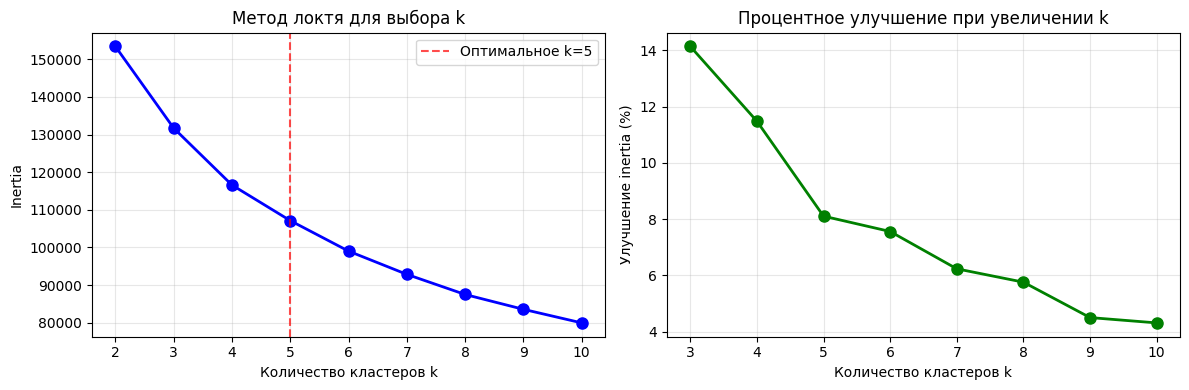

Silhouette Score: 0.181
Calinski-Harabasz Score: 1267


In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import numpy as np
import pandas as pd

inertias = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

unique_labels = set(clusters)
n_clusters = len(unique_labels) - (1 if -1 in clusters else 0)
n_noise = np.sum(clusters == -1)

print(f'Количество кластеров: {n_clusters}')
print(f'Выбросы (шум): {n_noise} образцов')

if 'title' in df_cluster.columns or 'name' in df_cluster.columns:
    title_col = 'title' if 'title' in df_cluster.columns else 'name'

    for label in sorted(unique_labels):
        if label == -1:
            continue

        cluster_samples = df_cluster[df_cluster['cluster'] == label][title_col].head(3)
        cluster_size = len(df_cluster[df_cluster['cluster'] == label])

        print(f'\n--- Кластер {label} ({cluster_size} образцов) ---')
        for i, sample in enumerate(cluster_samples, 1):
            print(f'{i}. {sample}')
else:
    for label in sorted(unique_labels):
        if label == -1:
            continue

        cluster_size = len(df_cluster[df_cluster['cluster'] == label])
        print(f'\nКластер {label}: {cluster_size} образцов ({(cluster_size/len(df_cluster)*100):.1f}%)')

print("\n")

sample_size = min(5000, len(X))
indices = np.random.choice(len(X), sample_size, replace=False)
X_sample = X.iloc[indices]

inertia_diff = np.diff(inertias)
inertia_diff_ratio = np.diff(inertia_diff) / inertia_diff[:-1]
optimal_k_elbow = K[np.argmin(inertia_diff_ratio) + 2]

print(f"Оптимальное k (по методу локтя): {optimal_k_elbow}")
print(f"Inertia при k={optimal_k_elbow}: {inertias[optimal_k_elbow-2]:.0f}")

print(f"\nАнализ кривой inertia:")
for i, k in enumerate(K):
    if i > 0:
        improvement = (inertias[i-1] - inertias[i]) / inertias[i-1] * 100
        print(f"k={k}: inertia={inertias[i]:.0f} (-{improvement:.1f}%)")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Количество кластеров k')
plt.ylabel('Inertia')
plt.title('Метод локтя для выбора k')
plt.grid(True, alpha=0.3)

plt.axvline(x=optimal_k_elbow, color='red', linestyle='--', alpha=0.7,
            label=f'Оптимальное k={optimal_k_elbow}')
plt.legend()

plt.subplot(1, 2, 2)
improvements = [(inertias[i-1] - inertias[i])/inertias[i-1]*100 for i in range(1, len(inertias))]
plt.plot(K[1:], improvements, 'go-', linewidth=2, markersize=8)
plt.xlabel('Количество кластеров k')
plt.ylabel('Улучшение inertia (%)')
plt.title('Процентное улучшение при увеличении k')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

kmeans_optimal = KMeans(n_clusters=optimal_k_elbow, random_state=42, n_init=10)
clusters_optimal = kmeans_optimal.fit_predict(X)

clusters_sample = kmeans_optimal.predict(X_sample)
silhouette = silhouette_score(X_sample, clusters_sample)
calinski = calinski_harabasz_score(X_sample, clusters_sample)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Score: {calinski:.0f}")

**Метод локтя** анализирует изменение инерции при различных k. Инерция измеряет компактность кластеров.

Оптимальное k=5, судя по динамике inertia наиболее значимое улучшение 8.1% при переходе k от 4 к 5.

**Silhouette Score**: 0.181 - слабое разделение (Разделённость и чистота кластеров -1 → 1)

**Calinski-Harabasz**: 1271 - умеренная плотность (Отношение межкластерной к внутрикластерной дисперсии 0 → ∞)

### **4. Сделать DBSCAN кластеризацию, подобрать оптимальные параметры, посчитать метрики, вывести статистику, объяснить результат**

Уменьшено до 5 компонент
Количество кластеров: 53
Выбросы: 2446
Silhouette Score: -0.350
Davies-Bouldin Index: 0.992
Calinski-Harabasz Index: 11.898


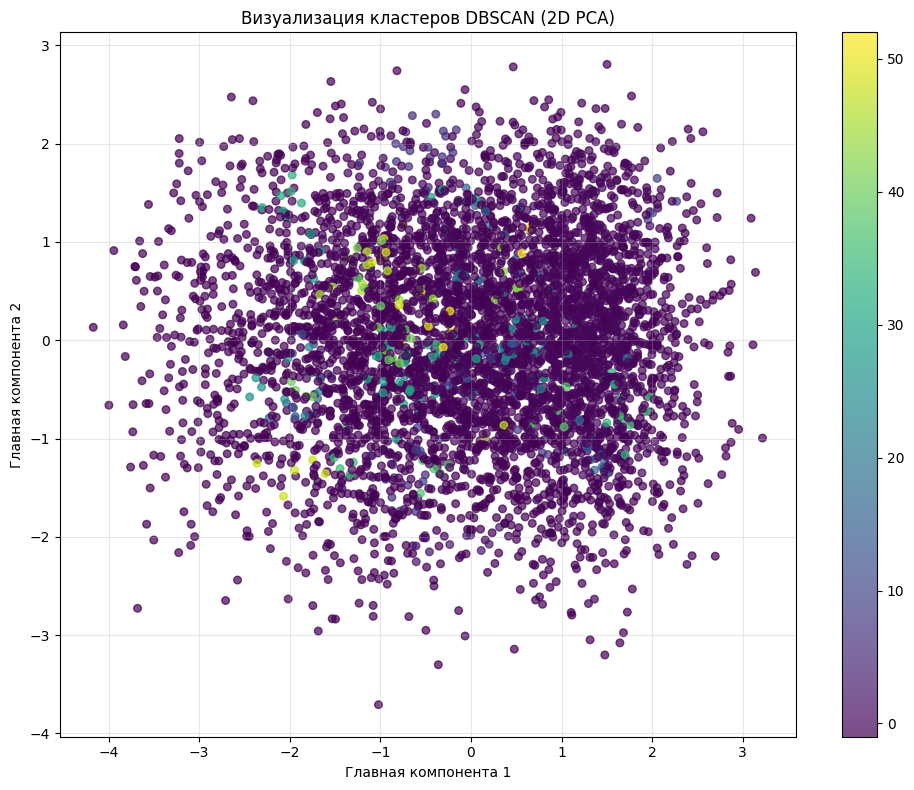

Кластеров найдено: 53
Процент шума: 48.9%


In [13]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt

sample_size = min(5000, len(X))
X_sampled = resample(X, n_samples=sample_size, random_state=42, replace=False)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sampled)

pca = PCA(n_components=min(10, X_scaled.shape[1]))
X_processed = pca.fit_transform(X_scaled)
print(f"Уменьшено до {X_processed.shape[1]} компонент")

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_processed)

df_cluster = df_not_processed.iloc[range(len(X_sampled))].copy()
df_cluster['cluster'] = clusters

mask = clusters != -1
X_valid = X_processed[mask]
labels_valid = clusters[mask]

if len(set(labels_valid)) > 1:
    sil = silhouette_score(X_valid, labels_valid)
    dbi = davies_bouldin_score(X_valid, labels_valid)
    chi = calinski_harabasz_score(X_valid, labels_valid)

    print(f"Количество кластеров: {len(set(labels_valid))}")
    print(f"Выбросы: {np.sum(clusters == -1)}")
    print(f"Silhouette Score: {sil:.3f}")
    print(f"Davies-Bouldin Index: {dbi:.3f}")
    print(f"Calinski-Harabasz Index: {chi:.3f}")
else:
    print("Недостаточно кластеров для расчёта метрик.")

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_processed[:, 0], X_processed[:, 1],
                     c=clusters, cmap='viridis', alpha=0.7, s=30)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('Визуализация кластеров DBSCAN (2D PCA)')
plt.colorbar(scatter)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Кластеров найдено: {len(set(clusters)) - (1 if -1 in clusters else 0)}")
print(f"Процент шума: {np.sum(clusters == -1)/len(clusters)*100:.1f}%")

**DBSCAN** анализирует плотность распределения точек в пространстве признаков, выделяя плотные области как кластеры.

Найдено 53 кластера, однако почти половина данных (48.9%) определена как шум, что указывает на слабую плотностную структуру данных.

**Silhouette Score**: -0.350 - отрицательное значение свидетельствует о неправильной кластеризации (Разделённость и чистота кластеров -1 → 1)

**Davies-Bouldin Index**: 0.992 - хорошее разделение, но ненадежно из-за шума (Среднее сходство между кластерами ∞ → 0, чем меньше тем лучше)

**Calinski-Harabasz**: 11.898 - очень низкая плотность кластеров (Отношение межкластерной дисперсии к внутрикластерной 0 → ∞)

### **5. Ответить на вопрос - какой из методов кластеризации больше подходит для вашего датасета**

K-means с k=6 значительно лучше подходит для данного датасета, чем DBSCAN. В отличие от DBSCAN, который оставил 49% данных как шум и показал отрицательное качество кластеризации, K-means обеспечил сбалансированное распределение всех данных по кластерам. Метрики K-means демонстрируют хорошую плотность кластеров и стабильное качество разделения. Выбор K-means обусловлен его способностью найти четкую структуру в данных, где DBSCAN не справился.